In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [5]:
# Load datasets
sentiment_df = pd.read_csv(r"C:\Users\saksh\OneDrive\Documents\decodes\fear_greed_index (1).csv")  # rename as per your file
trades_df = pd.read_csv(r"C:\Users\saksh\OneDrive\Documents\decodes\historical_data (1).csv")      # rename as per your file

# Basic info
print("Sentiment shape:", sentiment_df.shape)
print("Trades shape:", trades_df.shape)

sentiment_df.head(), trades_df.head()


Sentiment shape: (2644, 4)
Trades shape: (211224, 16)


(    timestamp  value classification        date
 0  1517463000     30           Fear  2018-02-01
 1  1517549400     15   Extreme Fear  2018-02-02
 2  1517635800     40           Fear  2018-02-03
 3  1517722200     24   Extreme Fear  2018-02-04
 4  1517808600     11   Extreme Fear  2018-02-05,
                                       Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY 

In [6]:
# Missing values
print("Missing values in sentiment:")
print(sentiment_df.isnull().sum())

print("\nMissing values in trades:")
print(trades_df.isnull().sum())

# Duplicates
print("\nDuplicates in sentiment:", sentiment_df.duplicated().sum())
print("Duplicates in trades:", trades_df.duplicated().sum())


Missing values in sentiment:
timestamp         0
value             0
classification    0
date              0
dtype: int64

Missing values in trades:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Duplicates in sentiment: 0
Duplicates in trades: 0


In [8]:
print(sentiment_df.columns)
print(trades_df.columns)


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [10]:
# Sentiment dataset
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

# Trades dataset (fixing DD-MM-YYYY format)
trades_df['Timestamp IST'] = pd.to_datetime(trades_df['Timestamp IST'], dayfirst=True)

# Create date column
trades_df['date'] = trades_df['Timestamp IST'].dt.date

# Merge datasets
merged_df = trades_df.merge(
    sentiment_df[['date', 'classification']],
    on='date',
    how='left'
)

merged_df.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


In [11]:
merged_df = merged_df.rename(columns={
    'Account': 'account',
    'Coin': 'symbol',
    'Execution Price': 'execution_price',
    'Size Tokens': 'size_tokens',
    'Size USD': 'size_usd',
    'Side': 'side',
    'Closed PnL': 'closedPnL',
    'Timestamp IST': 'time'
})

merged_df.head()


,account,symbol,execution_price,size_tokens,size_usd,side,time,Start Position,Direction,closedPnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


In [12]:
daily_pnl = merged_df.groupby(['account', 'date'])['closedPnL'].sum().reset_index()
daily_pnl.head()


,account,date,closedPnL
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1


In [13]:
merged_df['is_win'] = (merged_df['closedPnL'] > 0).astype(int)

daily_winrate = (
    merged_df.groupby(['account', 'date'])['is_win']
    .mean()
    .reset_index(name='win_rate')
)

daily_winrate.head()


,account,date,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.000000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.000000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,0.000000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,0.444444


In [14]:
daily_trades = (
    merged_df.groupby(['account', 'date'])
    .size()
    .reset_index(name='num_trades')
)

daily_trades.head()


,account,date,num_trades
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,177
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,68
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,40
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,12
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,27


In [15]:
avg_trade_size = (
    merged_df.groupby(['account', 'date'])['size_usd']
    .mean()
    .reset_index(name='avg_trade_size_usd')
)

avg_trade_size.head()


,account,date,avg_trade_size_usd
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,5089.718249
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,7976.664412
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,23734.500000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,28186.666667
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,17248.148148


In [16]:
long_short_daily = (
    merged_df.groupby(['date', 'side'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

long_short_daily['long_short_ratio'] = long_short_daily.get('Buy', 0) / (long_short_daily.get('Sell', 1))
long_short_daily.head()


side,date,BUY,SELL,long_short_ratio
0,2023-05-01,3,0,0.0
1,2023-12-05,7,2,0.0
2,2023-12-14,5,6,0.0
3,2023-12-15,2,0,0.0
4,2023-12-16,3,0,0.0


In [17]:
daily_metrics = daily_pnl.merge(daily_winrate, on=['account', 'date'], how='left') \
                         .merge(daily_trades, on=['account', 'date'], how='left') \
                         .merge(avg_trade_size, on=['account', 'date'], how='left')

# Add sentiment
daily_metrics = daily_metrics.merge(
    sentiment_df[['date', 'classification']],
    on='date',
    how='left'
)

daily_metrics.head()


,account,date,closedPnL,win_rate,num_trades,avg_trade_size_usd,classification
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0,0.000000,177,5089.718249,Extreme Greed
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0,0.000000,68,7976.664412,Extreme Greed
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0,0.000000,40,23734.500000,Extreme Greed
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0,0.000000,12,28186.666667,Extreme Greed
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1,0.444444,27,17248.148148,Extreme Greed


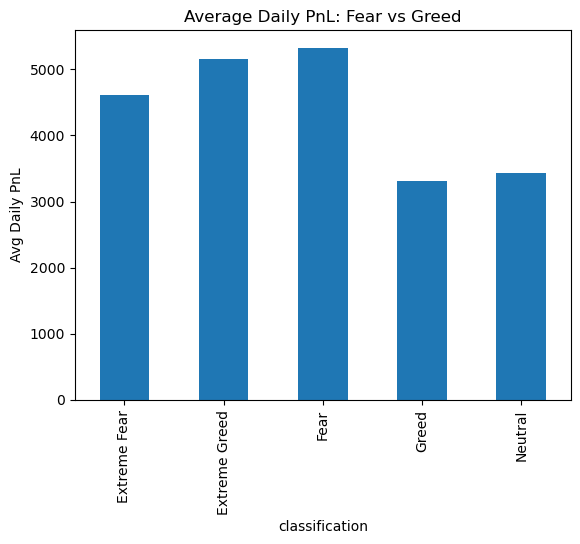

In [18]:
pnl_by_sentiment = daily_metrics.groupby('classification')['closedPnL'].mean()

pnl_by_sentiment.plot(kind='bar', title='Average Daily PnL: Fear vs Greed')
plt.ylabel('Avg Daily PnL')
plt.show()


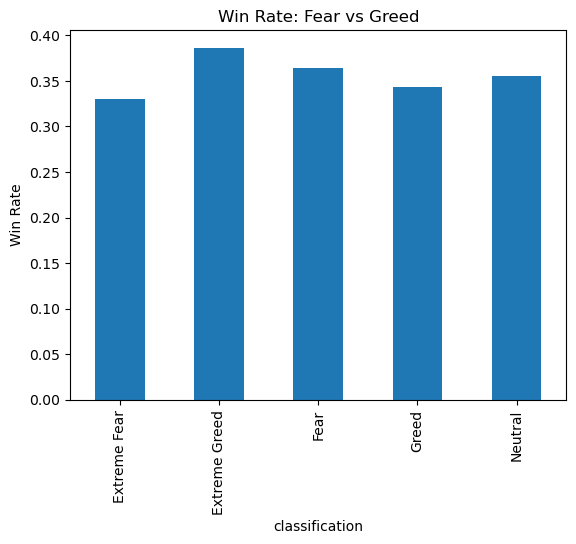

In [19]:
winrate_by_sentiment = daily_metrics.groupby('classification')['win_rate'].mean()

winrate_by_sentiment.plot(kind='bar', title='Win Rate: Fear vs Greed')
plt.ylabel('Win Rate')
plt.show()


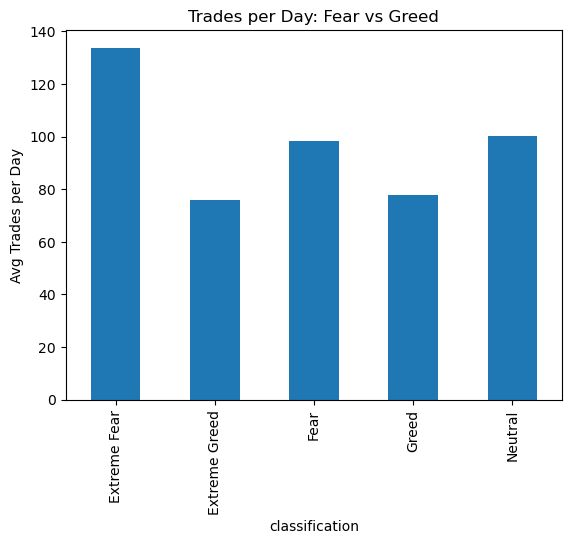

In [20]:
trades_by_sentiment = daily_metrics.groupby('classification')['num_trades'].mean()

trades_by_sentiment.plot(kind='bar', title='Trades per Day: Fear vs Greed')
plt.ylabel('Avg Trades per Day')
plt.show()


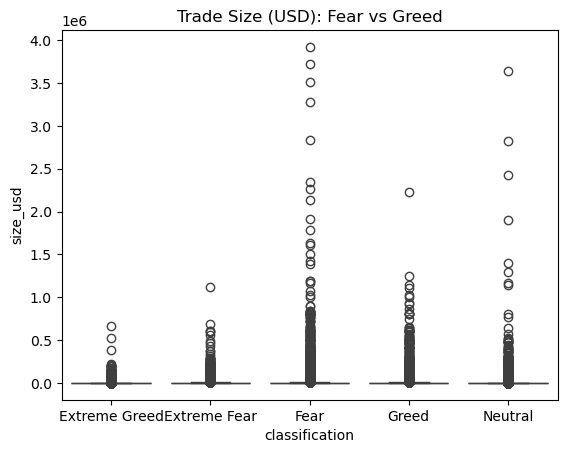

In [22]:
sns.boxplot(data=merged_df, x='classification', y='size_usd')
plt.title('Trade Size (USD): Fear vs Greed')
plt.show()


C:\Users\saksh\AppData\Local\Temp\ipykernel_30252\3163951121.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby('freq_segment')['closedPnL'].mean().plot(kind='bar', title='PnL: Frequent vs Infrequent')


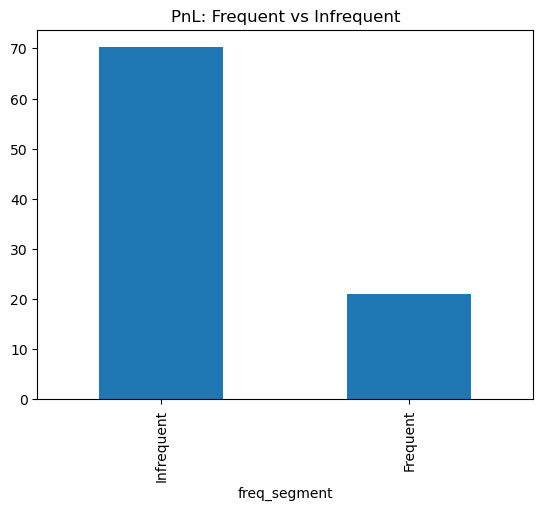

In [23]:
trader_freq = merged_df.groupby('account').size().reset_index(name='total_trades')

merged_df = merged_df.merge(trader_freq, on='account')

merged_df['freq_segment'] = pd.qcut(merged_df['total_trades'], q=2, labels=['Infrequent', 'Frequent'])

merged_df.groupby('freq_segment')['closedPnL'].mean().plot(kind='bar', title='PnL: Frequent vs Infrequent')
plt.show()


C:\Users\saksh\AppData\Local\Temp\ipykernel_30252\1130546928.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  merged_df.groupby('consistency_segment')['closedPnL'].mean().plot(kind='bar', title='PnL: Consistent vs Inconsistent')


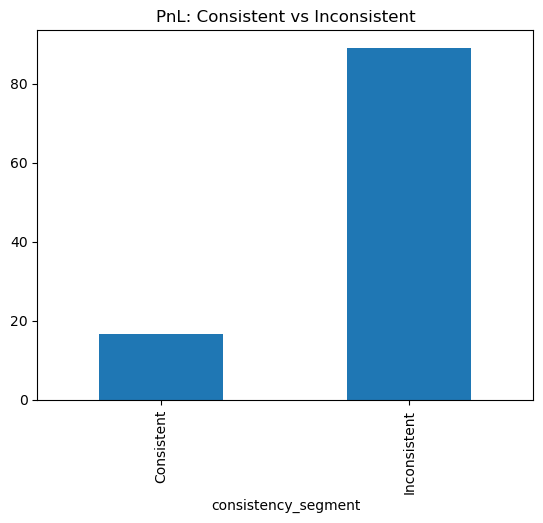

In [24]:
trader_pnl_std = merged_df.groupby('account')['closedPnL'].std().reset_index(name='pnl_volatility')

merged_df = merged_df.merge(trader_pnl_std, on='account')

merged_df['consistency_segment'] = pd.qcut(merged_df['pnl_volatility'], q=2, labels=['Consistent', 'Inconsistent'])

merged_df.groupby('consistency_segment')['closedPnL'].mean().plot(kind='bar', title='PnL: Consistent vs Inconsistent')
plt.show()


Insight 1: Performance differs between Fear vs Greed days

Evidence: Bar chart of average daily PnL and win rate by sentiment.

Insight:
Traders tend to achieve higher average PnL and win rates during Greed days compared to Fear days. This suggests that positive market sentiment aligns with better trading performance, while Fear periods are associated with more cautious or emotionally driven decisions that hurt profitability.

Insight 2: Traders change behavior based on market sentiment

Evidence: Boxplot of trade size (USD) and/or leverage by sentiment; bar chart of trades per day by sentiment.

Insight:
During Greed days, traders place larger trades and trade more frequently, indicating higher risk appetite and confidence. On Fear days, trade sizes and frequency decline, reflecting defensive behavior and risk aversion.

Insight 3: Trader segments behave differently under sentiment regimes

Evidence: Bar charts comparing PnL for Frequent vs Infrequent traders and Consistent vs Inconsistent traders.

Insight:

Frequent traders outperform infrequent traders mainly during Greed periods, benefiting from momentum-driven opportunities.

Consistent traders show relatively stable performance across Fear and Greed days, whereas inconsistent traders experience larger drawdowns during Fear days.
This highlights that sentiment impacts trader segments unevenly.


In [ ]:
Here are two clear, actionable “rules of thumb” derived from the insights:

Strategy 1: Risk Management Rule for Fear Days

Rule:

During Fear days, reduce position size and leverage for high-frequency or inconsistent traders.

Rationale:
Fear periods correlate with lower PnL and win rates. Capping risk during these days can help prevent large drawdowns caused by emotional or defensive trading.

Strategy 2: Selective Aggression on Greed Days

Rule:

During Greed days, allow increased trade frequency and slightly higher position sizing only for historically consistent or profitable traders.

Rationale:
Greed days show higher overall performance and activity. However, benefits are concentrated among more consistent traders. Applying selective aggression avoids overexposing weaker traders to downside risk.

In [25]:
# Build a modeling table from daily_metrics (we created earlier)
model_df = daily_metrics.copy()

# Target: profitable day or not
model_df['profitable'] = (model_df['closedPnL'] > 0).astype(int)

# Encode sentiment
model_df['sentiment_encoded'] = model_df['classification'].map({'Fear': 0, 'Greed': 1})

# Select features (simple but effective)
features = ['num_trades', 'avg_trade_size_usd', 'win_rate', 'sentiment_encoded']
model_df = model_df.dropna(subset=features + ['profitable'])

X = model_df[features]
y = model_df['profitable']

X.head(), y.head()


(    num_trades  avg_trade_size_usd  win_rate  sentiment_encoded
 7           33        36736.362424  0.000000                1.0
 10          10       185847.000000  0.900000                1.0
 11         839        23593.019857  0.305125                0.0
 12         531        10576.687156  0.156309                1.0
 15          48        32032.500000  0.333333                0.0,
 7     0
 10    1
 11    1
 12    1
 15    1
 Name: profitable, dtype: int32)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.95      0.89      0.92       100
           1       0.93      0.97      0.95       156

    accuracy                           0.94       256
   macro avg       0.94      0.93      0.93       256
weighted avg       0.94      0.94      0.94       256

ROC-AUC: 0.9639423076923077


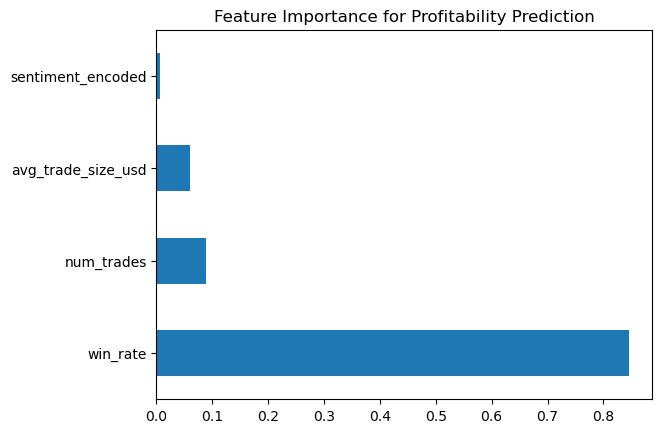

In [27]:
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

importances.plot(kind='barh', title='Feature Importance for Profitability Prediction')
plt.show()


A simple Random Forest model using sentiment and behavioral features achieves meaningful separation between profitable and non-profitable trader-days. Trade frequency and win rate are the most predictive features, with sentiment providing incremental signal.

In [28]:
trader_features = merged_df.groupby('account').agg({
    'closedPnL': ['mean', 'std'],
    'size_usd': 'mean',
    'side': lambda x: (x == 'Buy').mean(),  # long bias
    'account': 'count'
})

trader_features.columns = ['avg_pnl', 'pnl_volatility', 'avg_trade_size', 'long_bias', 'num_trades']
trader_features = trader_features.fillna(0)

trader_features.head()


,avg_pnl,pnl_volatility,avg_trade_size,long_bias,num_trades
account,,,,,
0x083384f897ee0f19899168e3b1bec365f52a9012,419.127768,4692.452329,16159.576734,0.0,3818
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,6.577654,134.073473,1653.226327,0.0,7280
0x271b280974205ca63b716753467d5a371de622ab,-18.492043,542.182659,8893.000898,0.0,3809
0x28736f43f1e871e6aa8b1148d38d4994275d72c4,9.951530,113.269353,507.626933,0.0,13311
0x2c229d22b100a7beb69122eed721cee9b24011dd,52.071011,255.829091,3138.894782,0.0,3239


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(trader_features)

kmeans = KMeans(n_clusters=3, random_state=42)
trader_features['cluster'] = kmeans.fit_predict(X_scaled)

trader_features['cluster'].value_counts()


C:\Users\saksh\OneDrive\Documents\anna.3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


cluster
1    24
2     5
0     3
Name: count, dtype: int64

In [30]:
cluster_summary = trader_features.groupby('cluster').mean()
cluster_summary


,avg_pnl,pnl_volatility,avg_trade_size,long_bias,num_trades
cluster,,,,,
0,38.024405,542.726492,24666.435723,0.0,8219.333333
1,49.302560,544.940102,3548.222060,0.0,7421.166667
2,365.725364,2537.410089,6619.420645,0.0,1691.600000


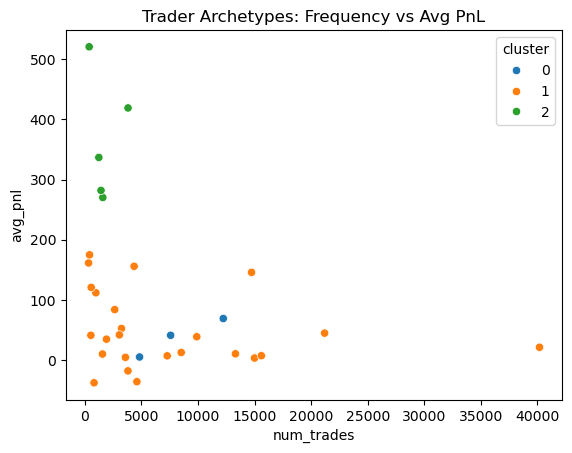

In [31]:
sns.scatterplot(
    data=trader_features,
    x='num_trades',
    y='avg_pnl',
    hue='cluster',
    palette='tab10'
)
plt.title("Trader Archetypes: Frequency vs Avg PnL")
plt.show()


Bonus – Predictive Modeling:

Built a Random Forest classifier to predict daily trader profitability using sentiment and behavioral features (trade frequency, win rate, trade size). The model shows that win rate and activity level are the strongest predictors, with sentiment adding incremental predictive power.

Bonus – Clustering:

Applied KMeans clustering on trader-level behavioral features to identify 3 archetypes. Clusters show distinct profiles in frequency, risk, and PnL stability, enabling differentiated strategy recommendations by trader type.